In [12]:
import tensorflow as tf
import keras
import tarfile
import os
import numpy as np
from keras import layers, models
from keras.datasets import cifar10
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
#normalize pixel values
x_train, x_test = x_train/255.0, x_test/255.0

In [4]:
#define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

d:\Users\shind\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
#compile the model
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.3558 - loss: 1.7369 - val_accuracy: 0.5456 - val_loss: 1.2487
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5762 - loss: 1.1909 - val_accuracy: 0.6084 - val_loss: 1.1126
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.6412 - loss: 1.0144 - val_accuracy: 0.6464 - val_loss: 1.0006
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6815 - loss: 0.9049 - val_accuracy: 0.6784 - val_loss: 0.9303
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7097 - loss: 0.8256 - val_accuracy: 0.6727 - val_loss: 0.9573
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7320 - loss: 0.7633 - val_accuracy: 0.7098 - val_loss: 0.8345
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7464 - loss: 0.7189 - val_accuracy: 0.6975 - val_loss: 0.9026
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 

In [7]:
#evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 2s - 8ms/step - accuracy: 0.6729 - loss: 3.6221


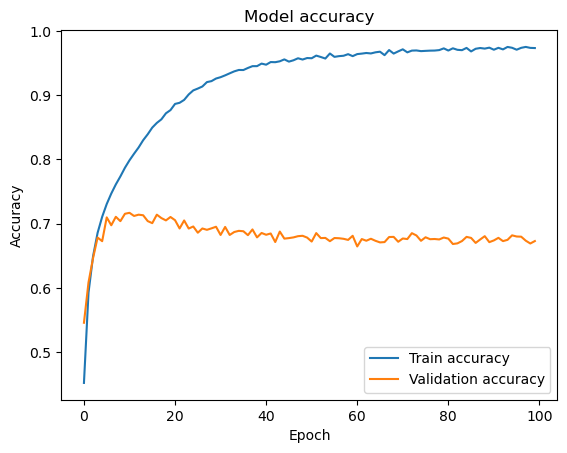

In [8]:
#plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

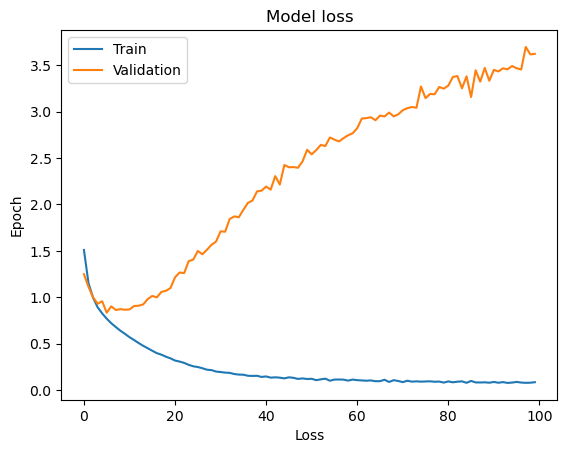

In [9]:
#plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [13]:
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

           0       0.77      0.65      0.70      1000
           1       0.79      0.83      0.81      1000
           2       0.63      0.49      0.55      1000
           3       0.43      0.48      0.45      1000
           4       0.64      0.66      0.65      1000
           5       0.50      0.68      0.58      1000
           6       0.79      0.71      0.75      1000
           7       0.76      0.68      0.72      1000
           8       0.81      0.75      0.78      1000
           9       0.74      0.80      0.77      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.68     10000
weighted avg       0.68      0.67      0.68     10000



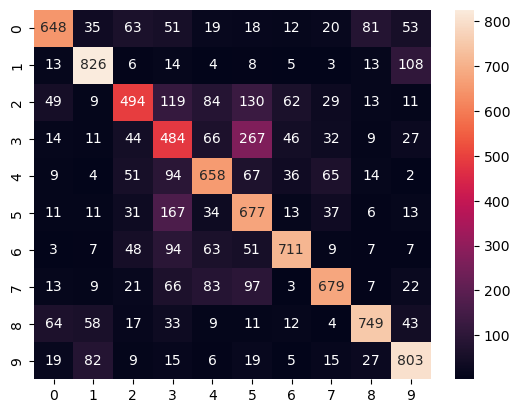

In [14]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()